In [101]:
import json
import pandas as pd
import ast
%matplotlib inline

In [30]:
#reads a weird json, and returns the bids dataframe and ads dataframe
def read_weird_json(path):
    bids = []
    ads = []

    with open(path) as f:
        for line in f:
            line_dict = json.loads(line)
            if 'advertiser_id' in line_dict:
                if line_dict['rate_metric'] != 'CPC':
                    continue
                ads.append(line_dict)
            else:
                bids.append(line_dict)

    df_bids = pd.DataFrame.from_records(bids)
    df_ads = pd.DataFrame.from_records(ads)  
    
    return [df_bids, df_ads]

#Returns a list of dataframes. Only looks at ads. 
def read_many_jsons(paths): 
    dfs = []
    for path in paths: 
        dfs += [read_weird_json(path)[1]]
    return dfs
    
dfs = read_many_jsons(['./data/01-09-00001'])

In [77]:
df = pd.concat(dfs)

In [78]:
df.head()

,_host,ad_network_id,ad_type,adlog_count,advertiser_id,app_id,app_name,app_ver,bd,bid_requests,...,user_agent,uuid,vi_cnt,vi_flag_cnt,vi_timestamp,vv_cnt,vv_timestamp_vvi,vv_vvi_cnt,widget_id,zone_id
0,an-prod-ralphie-frontline-proxy.us-east-1,1349,[story],NaN,3587,NaN,NaN,NaN,NaN,NaN,...,Mozilla/5.0 (iPad; U; CPU OS 4_2_1 like Mac OS...,787d2b11-b172-463c-95a3-c3997d0dc8f9,0.0,0.0,NaN,0.0,NaN,NaN,None,35201
1,an-prod-ralphie-frontline-lamed.us-east-1,922,[story],NaN,2780,NaN,NaN,NaN,NaN,NaN,...,NaN,c61907f9-39d4-4719-a43f-3eef5efc24c7,NaN,NaN,NaN,NaN,NaN,NaN,None,26024
2,an-prod-ralphie-frontline-goofs.us-east-1,1025,[story],NaN,2998,NaN,NaN,NaN,NaN,NaN,...,NaN,6212b840-508a-41dc-b474-13f259e9e04e,NaN,NaN,NaN,NaN,NaN,NaN,None,18704
3,an-prod-ralphie-frontline-gamic.us-east-1,1403,[story],NaN,3672,NaN,NaN,NaN,NaN,NaN,...,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,ad40b0f1-249e-4e17-8589-fdcc175bcc21,1.0,0.0,2018-04-01T09:46:46.130000Z,0.0,NaN,NaN,None,18101
4,an-prod-ralphie-frontline-soths.us-east-1,1349,[story],1.0,3587,NaN,NaN,NaN,NaN,"[22130, 2547, 21493, 21494, 5479, 15127, 3389,...",...,NaN,a5c2af66-9e93-4ad7-a5d9-85d65a923ed2,NaN,NaN,NaN,NaN,NaN,NaN,4436,18541


In [79]:
df.columns

Index([u'_host', u'ad_network_id', u'ad_type', u'adlog_count',
       u'advertiser_id', u'app_id', u'app_name', u'app_ver', u'bd',
       u'bid_requests', u'bid_responses', u'bundle_id', u'c_cnt',
       u'c_flag_cnt', u'c_timestamp', u'c_txn_fee', u'c_txn_rate',
       u'campaign_id', u'campaign_type', u'ck', u'cr', u'cr_cnt',
       u'creative_id', u'dnt', u'exp_mode', u'f_cnt', u'flag', u'gaid',
       u'geo_area_code', u'geo_city_code', u'geo_city_name',
       u'geo_continent_code', u'geo_country_code2', u'geo_country_code3',
       u'geo_dma_code', u'geo_postal_code', u'geo_region_name',
       u'geo_timezone', u'i_cnt', u'i_flag_cnt', u'i_timestamp', u'idfa',
       u'ip_address', u'is_bot', u'is_fraud', u'keywords', u'lat', u'lla',
       u'llsdk', u'long', u'num_ads', u'pub_campaign_id', u'pub_network_id',
       u'r_cnt', u'r_num_ads_requested', u'r_num_ads_returned',
       u'r_num_ads_third_party', u'r_timestamp', u'rate_metric', u'referer',
       u'sdk_version', u'session

In [80]:
df = df[['c_cnt', 'i_cnt', 'ck']]
df.head()

,c_cnt,i_cnt,ck
0,0.0,1.0,"{""widget_type"": [""image""]}"
1,NaN,NaN,"{""widget_type"": [""text_feed""]}"
2,NaN,NaN,"{""widget_type"": [""text_feed""]}"
3,0.0,1.0,"{""widget_type"": [""text_feed""]}"
4,NaN,NaN,"{""widget_type"": [""text_feed""]}"


In [116]:
df.dropna()
df = df.groupby('ck').sum()
df.head()
df['c_cnt/i_int'] = df['c_cnt'] / df['i_cnt']
df.sort_values(by=['c_cnt/i_int'],ascending=False, inplace=True)
df.head()

,c_cnt,i_cnt,c_cnt/i_int
ck,,,
"{""approved_providers"": [""taboola""], ""allowed_ad_types"": [""links"", ""story"", ""display""]}",1.0,23.0,0.043478
"{""allowed_ad_types"": [""links"", ""story"", ""video""]}",2.0,138.0,0.014493
"{""hb_pb"": [""0.15""], ""allowed_ad_types"": [""links"", ""story""]}",1.0,93.0,0.010753
"{""allowed_ad_types"": [""links"", ""story"", ""video"", ""display""]}",1.0,264.0,0.003788
"{""allowed_ad_types"": [""links"", ""story"", ""display""]}",2.0,595.0,0.003361


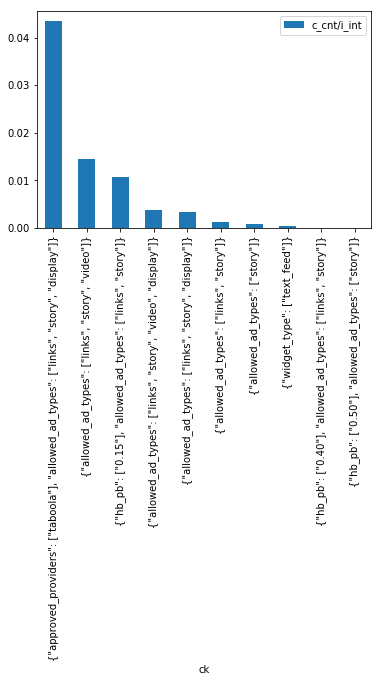

In [120]:
temp = df[:10]
temp.plot(y='c_cnt/i_int', kind='bar')

In [147]:
df = pd.concat(dfs)

In [148]:
df.columns

Index([u'_host', u'ad_network_id', u'ad_type', u'adlog_count',
       u'advertiser_id', u'app_id', u'app_name', u'app_ver', u'bd',
       u'bid_requests', u'bid_responses', u'bundle_id', u'c_cnt',
       u'c_flag_cnt', u'c_timestamp', u'c_txn_fee', u'c_txn_rate',
       u'campaign_id', u'campaign_type', u'ck', u'cr', u'cr_cnt',
       u'creative_id', u'dnt', u'exp_mode', u'f_cnt', u'flag', u'gaid',
       u'geo_area_code', u'geo_city_code', u'geo_city_name',
       u'geo_continent_code', u'geo_country_code2', u'geo_country_code3',
       u'geo_dma_code', u'geo_postal_code', u'geo_region_name',
       u'geo_timezone', u'i_cnt', u'i_flag_cnt', u'i_timestamp', u'idfa',
       u'ip_address', u'is_bot', u'is_fraud', u'keywords', u'lat', u'lla',
       u'llsdk', u'long', u'num_ads', u'pub_campaign_id', u'pub_network_id',
       u'r_cnt', u'r_num_ads_requested', u'r_num_ads_returned',
       u'r_num_ads_third_party', u'r_timestamp', u'rate_metric', u'referer',
       u'sdk_version', u'session

In [155]:
df = pd.concat(dfs)
print(df.shape)
df = df.groupby('ua_device').sum()
df = df[['c_cnt', 'i_cnt']]
df['c_cnt/i_int'] = df['c_cnt'] / df['i_cnt']
df.sort_values(by=['c_cnt/i_int'],ascending=False, inplace=True)
df.head(20)

(13738, 85)


,c_cnt,i_cnt,c_cnt/i_int
ua_device,,,
Samsung SM-T520,1.0,1.0,1.000000
CPH1723,1.0,1.0,1.000000
Turbo-X_A2,1.0,1.0,1.000000
Lenovo K53a48,1.0,2.0,0.500000
HUAWEI CAN-L11,1.0,2.0,0.500000
iQ9013_4,1.0,2.0,0.500000
VS990,1.0,3.0,0.333333
Samsung SM-J530F,1.0,20.0,0.050000
Samsung SM-J510FN,1.0,49.0,0.020408


In [156]:
df = pd.concat(dfs)
df = df[df.is_bot != True]
print(df.shape)
df = df.groupby('ua_device').sum()
df = df[['c_cnt', 'i_cnt']]
df['c_cnt/i_int'] = df['c_cnt'] / df['i_cnt']
df.sort_values(by=['c_cnt/i_int'],ascending=False, inplace=True)
df.head(20)

(11276, 85)


,c_cnt,i_cnt,c_cnt/i_int
ua_device,,,
Samsung SM-T520,1.0,1.0,1.000000
CPH1723,1.0,1.0,1.000000
Turbo-X_A2,1.0,1.0,1.000000
Lenovo K53a48,1.0,2.0,0.500000
HUAWEI CAN-L11,1.0,2.0,0.500000
iQ9013_4,1.0,2.0,0.500000
VS990,1.0,3.0,0.333333
Samsung SM-J530F,1.0,20.0,0.050000
Samsung SM-J510FN,1.0,49.0,0.020408
